# An Introduction to classes

### But first: Namespaces and Scopes
#### Namespaces
Formally, a *namespace* is a mapping from names to objects. When you type the name of a function or variable, the python interpreter has to map that string to the corresponding object. Depending on the namespace, the same name can lead to different objects. For example, there is the namespace of built-in functions, such as *abs*() and *max*(). There is also a namespace for included libraries, and one for each function invocation.
Some examples of the same name being resolved differently depending on the namespace:

In [ ]:
import numpy


print(abs(-1))       # This is the built-in abs function
print(numpy.abs(-1)) # This is the abs function from the numpy package
                     # The functions do effectively the same, but are different implementations
print(numpy.abs == numpy.abs)
print(numpy.abs == abs)

# You can also see this for the max functions 
print(max(5, 10))
print(numpy.max([5, 10]))           # Here the argument list is different

There is no relation between names in different namespaces! You can have two functions with the same name but in different namespaces do completely different things.

There are 4 types of namespaces:
- Built-In
- Global
- Enclosing
- Local

When the execution encounters a name, the namespaces are searched from *bottom to top* in this list until a name can be resolved.

##### Built-in
The first type of namespace was already shown in the example above. There are built-in functions that are available at all times and can be shown like this

In [ ]:
dir(__builtins__)

##### Global
The global namespace is created at the start of any program and contains all names defined at the level of the main program. This is where the user can come in and define functions

In [ ]:
def max(a, b):
    return "moritz"

print(max(5, 10)) # Herethe max function in the global namespace is found first
                 # and the Built-in namespace is not searched in 

The interpreter also creates namespaces for all modules that are imported, such as *numpy* in the example above. 
When importing modules, the names can also be made available at the global namespace of the program like this

In [ ]:
from numpy import max
max([5, 10])
#max(5, 10)  # fails, as the built-in namespace is only searched if the global namespace doesn't find the name

##### Local and Enclosing
Every function has their own namespace associated with it. The local namespace is created when the function is executed and 'forgotten' afterwards.

In [ ]:
a = 5.         # Defines a new variable called a at the global level

def foo():
    a = 10.    # Defines a new variable called a at the local level, unrelated to the global namespace
    b = -1
    print(a)   # The a from the local namespace is found first and printed
    print(b)   


foo()
print(a)    # The a from the global namespace is found and printed
#print(b)   # fails as there is no b in the global namespace

Observe the difference to this construction

In [ ]:
a = 5.         # Defines a new variable called a at the global level

def foo():
    print(a)   # The a from the global namespace is found and printed

foo()
print(a)    # The a from the global namespace is found and printed

If you want to modify a variable from the global namespace, you can specify that you want to use this variable with the *global* keyword

In [ ]:
a = 5.         # Defines a new variable called a at the global level

def foo():
    global a   # Tells python to use the a from the global level
    a = 10.    # Modifies the a at the global level
    print(a)


foo()
print(a)

This keyword also allows you to define a variable in the global namespace and makes it usable outside the current scope

In [ ]:
def foo():
    global xyz
    xyz = 10
foo()
print(xyz)

If you have nested functions the *enclosing* namespaces are the ones that are at a higher level of the function:

In [ ]:
del(a)  # delete from previous codeblocks in the notebook

def foo():
    a = 5
    b = 6
    
    def bar():
        a = 10  # creates a new variable in the local namespace
        print(a) # finds the a from the local namespace and not the enclosing
        print(b) # find the b from the enclosing namespace
    
    bar()
    print(a)
    print(b)

foo()
#print(a) would fail

Here, bar is defined inside of foo, so foo is the *enclosing* namespace for bar. A name lookup will first search the local namespace, then the enclosing namespace, then the global one(and finally the built-in one). 
To access the variables from the enclosing namespace, the *global* keyword cannot be used here. For this purpose there is the *nonlocal* keyword:

In [ ]:
def foo():
    a = 5
    
    def bar():
        nonlocal a # specifies to use the a from the enclosing namespace
        a = 10  # modifies the a in the enclosing namespace
        print(a) 
    
    bar()
    print(a)

foo()
#print(a) would fail

To get a feeling for this, you can play around with this example. Uncomment and comment out different lines and try to understand the output:

In [ ]:
x = 'global'

def foo():
    #global x
    x = 'enclosing'
    def bar():
        #nonlocal x
        #global x
        x = 'local'
        print(x)
    bar()
    print(x)
    
foo()
print(x)

### Scope
The *scope* of a name refers to the region of a code where it has meaning, where it can be associated with the object.

In [ ]:
def foo():
    c = 5 # c is defined
    def bar():
        print(c)  
    bar()  
    print(c)  # until here 'c' has meaning

foo()
print(c)   # outside of the scope of c

Once a variable is out of scope, it is forgotten and no longer accessible.

# Classes
### What is a class?
A class is a 'blueprint' for creating objects that binds together data (variables) and manipulation of such data (via *methods*)

### Class Definition

In [ ]:
class MyClass:
    classVariable = "This is a class variable"
    
    def classMethod(self):
        return "Hello Class World"
    

A class can have variables and methods (functions) associated to them. These are collectively called *attributes* of the class.

The syntax is easy: Everything in the indented block belongs to the class.

The class definition must be executed before it can be used. (In principle this enables definitions of classes inside conditional statements etc.)

The class defines its own namespace. It needs to be accessed as with the syntax such as "MyClass.classVariable"

### Class Instances
You can create an instance of a class with the following function notation:

In [ ]:
classInstance = MyClass()

This object now has the methods and variables associated with that class:

In [ ]:
print(classInstance.classMethod())
print(classInstance.classVariable)

The argument list of classMethod includes the *self* keyword. The *self* keyword refers to the instance of the class and is not needed in the argument list when calling the function. The following two lines are equivalent:

In [ ]:
print( classInstance.classMethod() )
print( MyClass.classMethod(classInstance) )

Classes can access their own methods and variables using the *self* keyword. These attritbutes can also be accessed from the outside

In [ ]:
class MyClass:
    classVariable = "This is a class variable"
    
    def classMethod(self):
        return "Hello Class World"
    
    def anotherClassMethod(self):
        return self.classMethod()
        #return MyClass.classMethod(self)  # which is equivalent 
    
classInstance = MyClass()

print(classInstance.anotherClassMethod())

#### Instance Variables
Every instance of a class can also have their own variables - *instance variables* - associated to them. They are created like local variables and only associated with that instance


In [ ]:
class MyClass:
    def startCounter(self):
        self.counter = 0
    
    def increaseCounter(self):
        self.counter += 1

classInstance = MyClass()    # creates an instance of MyClass

#print(classInstance.counter) # this will fail as the counter variable of the instance doesnt exist yet

classInstance.startCounter() # This function creates the counter variable of the instance
print(classInstance.counter) # now it can be accessed from the outside

classInstance.increaseCounter()
print(classInstance.counter)

classInstance.secondCounter = 0  # Instance Variables can also be created from outside the class
print(classInstance.secondCounter)

Of course, these instance variables can differ between instances

In [ ]:
class MyClass:    
    def startCounter(self):
        self.counter = 0
    
    def increaseCounter(self):
        self.counter += 1

classInstance = MyClass()

classInstance.startCounter()
print(classInstance.counter)

classInstance.increaseCounter()
print(classInstance.counter)

secondClassInstance = MyClass()  # Creates a second instance, unrelated to the first
secondClassInstance.startCounter() # and starts its own counter
print(secondClassInstance.counter)

secondClassInstance.increaseCounter()
print(secondClassInstance.counter)
print(classInstance.counter)     # the counter of the original instance wasn't affected

### Initialization
The most important instance variables are usually assigned on initialization. For this purpose, there is a special function for classes, the *\__init\__*(self,...) function. The *\__init\__*(self,...) function is called when the instance is first created:

In [ ]:
class MyClass:
    
    def __init__(self):
        self.instanceVariable = "This is an instance variable"
    
    def classMethod(self):
        return "Hello Class World"
    
    def anotherClassMethod(self):
        return self.instanceVariable

classInstance = MyClass()     # This implicitly calls the __init__ function
classInstance.anotherClassMethod()

The *\__init\__* function is called the *constructor* and can take a list of parameters that need to be passed on during initialization:

In [ ]:
class Person:
    def __init__(self, name, age):
        self.name = name 
        self.age = age
    
    def call(self):
        print("Hey " + self.name)

bill = Person("Michael", 53)
janet = Person("Janet", 35)

bill.call()
janet.call()

#### Class Variable vs Instance Variable
Care must be taken to differentiate between class variables and instance variables. Class variables are copied on each instantiantion of a class, while instance variables are created from scratch. This can have unintended effects for mutable variables, because their copies are *shallow*, i.e. they are copied by reference:

In [ ]:
class Person:
    hobbies = []   # here, hobbies is defined as a class variable
    
    def __init__(self, name):
        self.name = name
        
    def addHobby(self, hobby):
        self.hobbies.append(hobby)


michael = Person("Michael")
michael.addHobby("Yoga")
janet = Person("Janet")
janet.addHobby("Marbles")

michael.hobbies

In [ ]:
class Person:
    
    def __init__(self, name):
        self.name = name
        self.hobbies = []  # declare hobbies as an instance variable instead

    def addHobby(self, hobby):
        self.hobbies.append(hobby)


michael = Person("Michael")
michael.addHobby("Yoga")
janet = Person("Janet")
janet.addHobby("Marbles")

michael.hobbies

Generally, it is advisable to use class variables only for values that stay constant between all instances and mostly use instance variables instead.

#### Printing
To simplify output, the classes can define a function that returns a string to represent that object. This is the *\__str\__* function:

In [ ]:
class Person:
    def __init__(self, name, age):
        self.name = name      # creates an instance variable
        self.age = age
    
    def __str__(self):
        return self.name + ", " + str(self.age)

chihiro = Person("Chihiro", 10)

print(chihiro)
str(chihiro)

Another function for a similar purpose is *\__repr\__*, the representation. It is internally used when outputting lists for example

In [ ]:
class Person:
    def __init__(self, name, age):
        self.name = name      # creates an instance variable
        self.age = age
    
    def __str__(self):
        return self.name + ", " + str(self.age)
    
    def __repr__(self):
        return "Person: " + self.name

people = [Person("Michael", 53), Person("Janet", 35), Person("Chihiro", 10)]

print(people)

#### Task 1
Make a class modeling a car with the attributes *model*, *cost*, *fuel efficiency* (km/liter), *condition*, and *mileage*. The *condition* is supposed to model the status of the car in terms of functionality, which of course diminishes over time. Implement a sensible *\__init\__* function and additional functions:
 - Drive: Takes distance and fuel price as an input. The distance is added to the mileage. It also prints an estimate of the fuel cost and adds it to the total cost. The condition of the car deteriorates at a rate of (1%/1000km). If this drops below 0% the car stops working.
 - Repair: The car is taken to the garage. The condition is set back to 100% at a cost of 100€/1%. The cost is printed and added to the total cost.
 - LifetimeCost: Outputs the mileage and total cost of the car so far
 - Honk: ;)
 
If you were to buy a new green VMW Imaginaris (cost 20k€) with a fuel efficiency of 0.05L/km what would be the approximated cost after driving for 10^5 km?
 And for the newer version VMW Imaginaris^2 for 25k€ with 0.04L/km?

In [ ]:
class Car:
    
    def __init__(self, model, cost, fuel_efficiency, condition=1., mileage=0.):
    
    def drive(self, distance, fuel_price):
        
    def repair(self):

    def lifetimeCost(self):

ToyotaIm = Car("VMW Imaginaris", 2e4, 0.05)
ToyotaIm.drive(1e5, 2)
ToyotaIm.repair()
ToyotaIm.lifetimeCost()

### Why use classes?
- Enables encapsulation: Bind together data and code that manipulates the data in the same place
- Brings structure into the code, and allows *real-world mapping*
- Polymorphism -> See the following

## Inheritance

In object-oriented programming, inheritance describes the process of basing a class on another class' implemententation, thus *inheriting* its properties. 
The *child class* inherits all variables and methods from the parent class and can expand on them.

In [ ]:
class A:
    text = "This is set in A"
    
    def f(self):
        print(self.text)
    

class B(A):   # This tells python that B inherits from A
    text = "This is set in B"
    
    def g(self):
        print("A new function")

a = A()
a.f()     # calls f in A, which accesses the text variable in A
b = B()
b.f()     # calls f defined in A, but accesses the text variable from B
b.g()     # calls the newly defined function, which would not work for a

The child class can also *override* functions from their parent class:

In [ ]:
class A:
    def f(self):
        print("Parent function")
    

class B(A):
    def f(self):
        print("Child function")

a = A()
b = B()

a.f()
b.f()  

A.f(b)        # This calls the function in the parent class for b

The overwritten function can still be accessed from inside the child class

In [ ]:
class A:
    def f(self):
        print("Parent function")
    

class B(A):
    def f(self):
        super().f()    # first, A.f is called 
        print("Child function")  # then new stuff is done


b = B()
b.f()

This is especially useful when initializing an object

In [ ]:
class A:
    def __init__(self, text):
        self.text = text
    #...
class B(A):
    def __init__(self, text, moreText):
        super().__init__( text)
        self.moreText = moreText

b = B("abc", "def")
print(b.text, b.moreText)

Every instance of the child class also has the attributes from the parent class, so they can "impersonate" them. This makes generalizing and specializing easy. 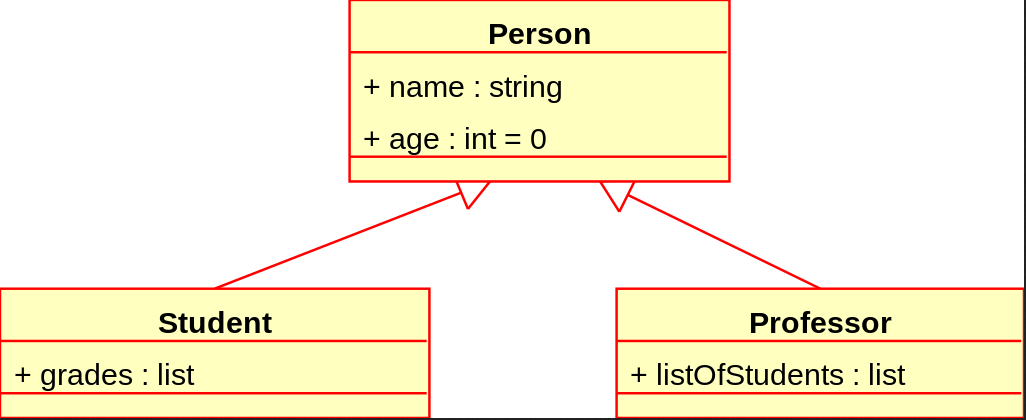

### Why use inheritance?

- Code Reusability
- Enables Subtyping (IsA relation): Dog > Mammal > Animal
- Logical Hierarchy
- Use Polymorphism: Calling code is agnostic to the specific implementation

## Example: Dark Matter Halos
We will look at different DM halo profiles again. Since they all share the same idea of describing the density and mass profile of a halo, it makes sense to use classes and inheritance features. To this end, we define the abstract basis class DMHalo, which doesn't describe a specific halo, but tells us how what properties a halo class should have.

The 3 profiles we will look at are
1. a constant density profile
\begin{equation}
\rho_{static}(r) = \rho_0
\end{equation}
2. an NFW profile
\begin{equation}
\rho_{NFW}(r) = \frac{\rho_0}{\frac{r}{r_s} (1 + \frac{r}{r_s})^2} 
\end{equation}
3. a NFW profile with a central density spike
\begin{equation}
\rho_{SpikedNFW} = \begin{cases}
               \rho_{spike} \left(\frac{r_{spike}}{r}\right)^{\alpha}, \quad r <= r_{spike} \\
               \rho_{NFW}(r), \quad  r > r_{spike}
            \end{cases}
\end{equation}
with the parameters chosen such that $\rho_{spike} = \rho_{NFW}(r_{spike})$

The constant and NFW profiles can inherit from this base class, and the SpikedNFW profile can inherit from the NFW and modify its density in the appropriate region. 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# abstract base class for the DM halo
class DMHalo:
    def __init__(self, rho_0):
        self.rho_0 = rho_0
    
    def density(self, r):
        pass
    
    def __str__(self):
        return "DMHalo"
    
    def mass(self, r):
        pass

In [ ]:
class ConstHalo(DMHalo):
    def __init__(self, rho_0):
        super().__init__(rho_0)
        
    def density(self, r):
        return self.rho_0 * np.ones(np.shape(r))
    
    def __str__(self):
        return "ConstHalo"


In [ ]:
class NFW(DMHalo):
    def __init__(self, rho_0, r_s):
        super().__init__(rho_0)
        self.r_s = r_s
    
    def density(self, r):
        return self.rho_0 / (r/self.r_s) / (1. + r/self.r_s)**2
    
    def __str__(self):
        return "NFW"
    

In [ ]:
class SpikedNFW(NFW):
    def __init__(self, rho_s, r_s, r_spike, alpha):
        super().__init__(rho_s, r_s)
        self.alpha = alpha
        self.r_spike = r_spike
        self.rho_spike = rho_s * r_s/r_spike / (1.+r_spike/r_s)**2
    
    def density(self, r):
        return np.where( r < self.r_spike, \
                           self.rho_spike * (self.r_spike/r)**self.alpha, \
                        super().density(r))

    def __str__(self):
        return "SpikedNFW"


In [ ]:
# This is a function that plots the density for any object that has a density attribute
def plotHalo(halo):
    r = np.geomspace(1, 1e5)
    l, = plt.loglog(r, halo.density(r), label=str(halo))
    #plt.loglog(r, halo.mass(r), linestyle='--', color=l.get_c())

In [ ]:
plotHalo(ConstHalo(5.))
plotHalo(NFW(10, 1e3))
plotHalo(SpikedNFW(10., 1e4, 1e2, 7./3.))
plt.xlabel("r"); plt.ylabel(r"$\rho$")
plt.legend(); plt.grid();

#### Task 2
Implement a mass function inside the classes and plot it alongside the density profile.
There are two possible approaches to this:
1. Implement the analytical mass function for each class individually
2. Implement a numerical integration scheme in the base class and let inheritance do the rest  (tip: use odeint)

What are the pros and cons of each approach?

#### Implement both and compare the results